In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('titanic.csv')

print(df.head())

print("datas info:")
print(df.info())

# hypothesis: Women survived more?
# survived: 0 = No, 1 = Yes

print('survived by gender:')
print(df.groupby('Sex')['Survived'].mean())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
da

Вывод: Правило "Женщины и дети первыми" работало железно. Если ты мужчина на Титанике, то шансы на выживаемость так себе.

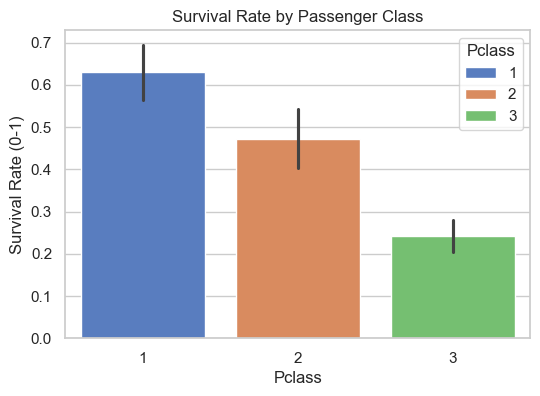

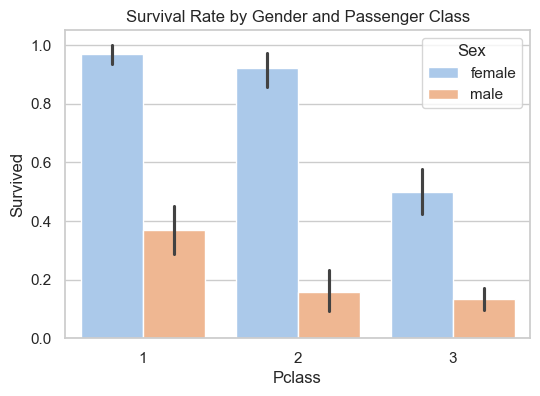

In [4]:
sns.set(style="whitegrid")

# plot 1: Survival rate by class (1st - richest, 3rd - poorest)
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (0-1)')
plt.show()

# plot 2: Survival rate by gender and class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

По первому графику заметно, что в первом классе выживаемость больше 0.6, значит, что выживали в основном богатые люди.

По второму графику можно сказать, что практически все женщины из 1-го и 2-го класса выжили, что не скажешь о мужчинах. Они гибли в независимости от класса.

In [5]:
# 1. data gaps
print("gaps:")
print(df.isnull().sum())

# 2. fill gaps with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3. drop useless columns
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

print("cleaned data info:")
print(df.info())

gaps:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


C:\Users\ushko\AppData\Local\Temp\ipykernel_16084\756215177.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


177 пропусков возраста заполнили медианой, теперь у нас 891 ненулевых строчек

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Coding categorical variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.80


В результате получился алгоритм, который в 4 из 5 случаев правильно угадывает, выжил ли человек на Титаник или нет, зная его пол, класс, возраст и порт посадки 